# 2012-2015년 데이터로 모델 만들기(남자)

In [1]:
import pandas as pd
from itertools import *

In [2]:
dataset_male = pd.read_csv('./hospital_male_0802_test3.csv', encoding='cp949')
dataset_male = dataset_male[dataset_male['yyyy'].astype(str).str.contains('2012|2013|2014|2015')].reset_index(drop=True)#2016년 전만 추출
# dataset_male.drop(columns=['sex', 'heat_wave','cold_wave'], inplace=True)
# dataset_male.to_csv('male_df.csv', encoding='cp949')
#이창훈
male_df = dataset_male[['area','mm','dd','weekday','total_pop','elderly_ratio',
                          'avg_hum','diff_hum','diff_temp','avg_ps','pm10_7b',
                          'avg_age','min_temp','frequency']]
#     ['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
#                           'pm10_7b','diff_hum','diff_temp','avg_ps',
#                           'avg_age','min_max_ps', 'avg_hum','frequency']]
#이이슬
# male_df = dataset_male[['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
#                           'pm10_31b','diff_hum','diff_temp','avg_ps',
#                           'o3','avg_age','min_max_ps', 'avg_hum','frequency']]
# fixed_df = dataset2[['area', 'mm', 'frequency','total_pop', 'elderly_ratio','so2','pm10','rhm_min_avg_dif','min_max_Ta','avg_ps']]
male_df

,area,mm,dd,weekday,total_pop,elderly_ratio,avg_hum,diff_hum,diff_temp,avg_ps,pm10_7b,avg_age,min_temp,frequency
0,강원,1,1,6,772718,12.460044,58.333333,65.0,12.3,1023.886667,30.158333,39.4,-7.3,3.0
1,경기,1,1,6,6020446,7.432174,50.733333,27.0,7.9,1024.875000,28.537404,36.1,-6.9,4.0
2,경남,1,1,6,1665308,9.179443,44.916667,47.0,9.9,1022.950000,26.719907,37.4,-2.9,2.0
3,경북,1,1,6,1354649,12.336406,52.377778,70.0,12.0,1023.268000,25.336806,39.5,-5.9,6.0
4,광주,1,1,6,726529,7.679253,75.833333,15.0,3.9,1025.250000,18.958333,35.3,-0.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24832,전남,12,31,3,953881,16.198981,66.764033,65.0,12.3,1031.053846,46.708333,42.1,-2.3,0.0
24833,전북,12,31,3,930255,14.539347,73.750000,50.0,10.0,1031.300000,72.548882,40.9,-3.0,1.0
24834,제주,12,31,3,313428,11.063466,59.915541,33.0,4.9,1030.792308,56.156250,38.7,5.4,0.0
24835,충남,12,31,3,1054439,13.477024,74.725225,55.0,9.0,1031.513333,79.543252,40.2,-3.0,0.0


In [3]:
# male_df.to_csv('male_df.csv', encoding='cp949')

In [4]:
male_df['frequency'].value_counts()

0.0     9152
1.0     6704
2.0     4083
3.0     2230
4.0     1140
5.0      708
6.0      370
7.0      208
8.0      127
9.0       66
10.0      30
11.0      12
12.0       5
13.0       2
Name: frequency, dtype: int64

In [5]:
# q3 = male_df.quantile(0.75) # df['국어'].quantile(0.75) 처럼 특정 열만 적용 가능
# q1 = male_df.quantile(0.25)

# iqr = q3 - q1

# def is_freq_outlier(df):
#     freq_score = df['frequency']
#     if freq_score > 10:
# #     if freq_score > q3['frequency'] + 1.5 * iqr['frequency'] or freq_score < q1['frequency'] - 1.5 * iqr['frequency']:
#         return True
#     else:
#         return False

# # apply 함수를 통하여 각 값의 이상치 여부를 찾고 새로운 열에 결과 저장
# male_df['freq_outlier'] = male_df.apply(is_freq_outlier, axis = 1) # axis = 1 지정 필수
# # female_df[female_df['freq_outlier']==True]
# male_df = male_df.drop(male_df[male_df['freq_outlier']==True].index, axis=0)
# male_df.drop(columns=['freq_outlier'], inplace=True)
# male_df.reset_index(drop=True, inplace=True)
# male_df

In [6]:
male_data = male_df.sample(frac=0.8, random_state=786) 
male_data_unseen = male_df.drop(male_data.index) 

male_data.reset_index(drop=True, inplace=True) 
male_data_unseen.reset_index(drop=True, inplace=True) 

print('Data for Modeling: ' + str(male_data.shape)) 
print('Unseen Data For Predictions: ' + str(male_data_unseen.shape)) 


Data for Modeling: (19870, 14)
Unseen Data For Predictions: (4967, 14)


## 모델 환경 설정 (Settinf up Environment in PyCaret)

- pycaret을 사용하기 전에 pycaret에 맞게 데이터를 설정
- set_up() 함수를 사용
- 기본적으로 data와 target을 입력

In [7]:
# 자동으로 데이터 유형 지정 
from pycaret.regression import *
male_data_s = setup(male_data, target = 'frequency', session_id=123, categorical_features=['area','mm','weekday',
#                                                                                            'heat_wave','cold_wave'
                                                                                          ],
         remove_multicollinearity = True, multicollinearity_threshold = 0.6)

,Description,Value
0,Session id,123
1,Target,frequency
2,Target type,Regression
3,Data shape,"(19870, 11)"
4,Train data shape,"(13908, 11)"
5,Test data shape,"(5962, 11)"
6,Numeric features,12
7,Categorical features,3
8,Preprocess,True
9,Imputation type,simple


#### set_up(): pycaret을 사용하기 위한 data setting

- session_id: random_state와 같은 개념으로 같은 결과가 나올 수 있게 seed를 고정
- data: train 데이터 입력
- target = target 변수 이름을 입력

## 모델 생성 - 비교

- 여러 모델을 적합하여 성능을 비교하는 단계
- compare_models(): 다양한 모델 적합 후 성능 비교
    - fold: cross_validation의 fold를 지정 (default = 10)
    - sort: 정렬기준 지표 설정
    - n_select: 상위 n개의 모델 결과만 출력

In [8]:
# 이창훈
male_best_model_5 = compare_models(sort='RMSE', n_select = 5)
male_tuned_top5 = [tune_model(i, optimize = 'RMSE', n_iter=10) for i in male_best_model_5]
model_male = blend_models(estimator_list=male_tuned_top5, optimize = 'RMSE')

# 이이슬
# male_best_model_5 = compare_models(sort='RMSE', n_select = 5)
# model_male = ensemble_model(male_best_model_5[0], method='Bagging', choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.9101,1.5444,1.2422,0.4716,0.4864,0.4522,0.0190
lr,Linear Regression,0.9104,1.5445,1.2423,0.4716,0.4865,0.4527,0.2320
ridge,Ridge Regression,0.9103,1.5445,1.2423,0.4716,0.4865,0.4526,0.0190
lar,Least Angle Regression,0.9104,1.5445,1.2423,0.4716,0.4865,0.4527,0.0160
omp,Orthogonal Matching Pursuit,0.9118,1.5891,1.2601,0.4563,0.4888,0.4419,0.0200
et,Extra Trees Regressor,0.9317,1.5995,1.2641,0.4530,0.4984,0.4522,0.1050
rf,Random Forest Regressor,0.8994,1.6417,1.2808,0.4383,0.5090,0.4485,0.3570
huber,Huber Regressor,0.9251,1.6619,1.2885,0.4315,0.4895,0.4420,0.0320
gbr,Gradient Boosting Regressor,1.0002,1.6621,1.2889,0.4312,0.5397,0.4306,0.2140
lightgbm,Light Gradient Boosting Machine,0.9763,1.6697,1.2918,0.4286,0.5280,0.4355,0.0320


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8956,1.4795,1.2164,0.4717,0.4883,0.4490
1,0.9421,1.6872,1.2989,0.4672,0.4799,0.4510
2,0.9267,1.5773,1.2559,0.4531,0.4916,0.4814
3,0.8826,1.4339,1.1974,0.4855,0.4822,0.4298
4,0.8739,1.4666,1.2110,0.5154,0.4620,0.4305
5,0.9147,1.5874,1.2599,0.4883,0.4873,0.4554
6,0.8939,1.5073,1.2277,0.4792,0.4881,0.4354
7,0.9257,1.5440,1.2426,0.4362,0.4990,0.4821
8,0.9600,1.6901,1.3000,0.4288,0.5109,0.4774


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8958,1.4796,1.2164,0.4717,0.4884,0.4495
1,0.9425,1.6873,1.2989,0.4672,0.4799,0.4516
2,0.9270,1.5778,1.2561,0.4529,0.4917,0.4819
3,0.8829,1.4339,1.1975,0.4855,0.4823,0.4304
4,0.8742,1.4666,1.2110,0.5154,0.4621,0.4310
5,0.9150,1.5874,1.2599,0.4883,0.4874,0.4560
6,0.8941,1.5075,1.2278,0.4792,0.4882,0.4359
7,0.9260,1.5440,1.2426,0.4361,0.4991,0.4826
8,0.9603,1.6902,1.3001,0.4288,0.5110,0.4779


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8956,1.4795,1.2164,0.4717,0.4883,0.4490
1,0.9421,1.6872,1.2989,0.4672,0.4799,0.4509
2,0.9267,1.5773,1.2559,0.4531,0.4916,0.4813
3,0.8826,1.4339,1.1974,0.4855,0.4822,0.4298
4,0.8739,1.4666,1.2110,0.5154,0.4619,0.4304
5,0.9147,1.5874,1.2599,0.4883,0.4873,0.4554
6,0.8939,1.5073,1.2277,0.4792,0.4880,0.4354
7,0.9257,1.5440,1.2426,0.4362,0.4990,0.4820
8,0.9600,1.6901,1.3000,0.4288,0.5109,0.4773


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8958,1.4796,1.2164,0.4717,0.4884,0.4495
1,0.9425,1.6873,1.2989,0.4672,0.4799,0.4516
2,0.9270,1.5778,1.2561,0.4529,0.4917,0.4819
3,0.8829,1.4339,1.1975,0.4855,0.4823,0.4304
4,0.8742,1.4666,1.2110,0.5154,0.4621,0.4310
5,0.9150,1.5874,1.2599,0.4883,0.4874,0.4560
6,0.8941,1.5075,1.2278,0.4792,0.4882,0.4359
7,0.9260,1.5440,1.2426,0.4361,0.4991,0.4826
8,0.9603,1.6902,1.3001,0.4288,0.5110,0.4779


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8958,1.4796,1.2164,0.4717,0.4884,0.4495
1,0.9421,1.6862,1.2986,0.4675,0.4799,0.4512
2,0.9265,1.5753,1.2551,0.4538,0.4915,0.4815
3,0.8828,1.4336,1.1973,0.4856,0.4823,0.4301
4,0.8741,1.4662,1.2109,0.5155,0.4619,0.4310
5,0.9148,1.5868,1.2597,0.4884,0.4874,0.4558
6,0.8942,1.5077,1.2279,0.4791,0.4882,0.4359
7,0.9259,1.5440,1.2426,0.4362,0.4991,0.4825
8,0.9601,1.6900,1.3000,0.4288,0.5110,0.4777


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8957,1.4796,1.2164,0.4717,0.4884,0.4493
1,0.9422,1.6870,1.2988,0.4672,0.4799,0.4513
2,0.9268,1.5771,1.2558,0.4532,0.4916,0.4816
3,0.8828,1.4338,1.1974,0.4855,0.4822,0.4301
4,0.8740,1.4665,1.2110,0.5154,0.4620,0.4308
5,0.9148,1.5872,1.2599,0.4883,0.4874,0.4557
6,0.8941,1.5075,1.2278,0.4792,0.4881,0.4357
7,0.9258,1.5440,1.2426,0.4362,0.4990,0.4824
8,0.9601,1.6901,1.3000,0.4288,0.5109,0.4777


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# 2016년 예측(남자)

In [9]:
test_male = pd.read_csv('./hospital_male_0802_test3.csv', encoding='cp949') #이 csv 파일은 2016년 데이터까지 포함한 것
# dataset3.drop(columns=['Unnamed: 0'], inplace=True)
test_male = test_male[['area','yyyy','mm','dd','weekday','total_pop','elderly_ratio',
                          'avg_hum','diff_temp','avg_ps','diff_hum','pm10_7b',
                          'avg_age','min_temp','frequency']]
#     ['area','yyyy','dd','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
#                           'pm10_7b','diff_hum','diff_temp','avg_ps',
#                           'avg_age','min_max_ps', 'avg_hum','frequency']]
test_male

,area,yyyy,mm,dd,weekday,total_pop,elderly_ratio,avg_hum,diff_temp,avg_ps,diff_hum,pm10_7b,avg_age,min_temp,frequency
0,강원,2011,12,1,3,773278,12.405500,83.354839,3.845070,1027.575000,33.314706,NaN,39.3,-0.271831,NaN
1,경기,2011,12,1,3,6015357,7.388123,65.448276,5.413208,1025.875000,28.227586,NaN,36.0,3.124528,NaN
2,경남,2011,12,1,3,1664755,9.147472,74.583333,3.112821,1023.921429,19.566667,NaN,37.3,4.946154,NaN
3,경북,2011,12,1,3,1355727,12.284700,81.000000,3.338182,1026.137500,28.800000,NaN,39.5,2.923636,NaN
4,광주,2011,12,1,3,725606,7.629485,89.000000,3.840000,1022.900000,23.066667,NaN,35.3,4.740000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31581,전남,2016,12,31,5,951889,16.677050,65.555094,13.700000,1030.607692,49.000000,33.635000,42.6,-4.700000,NaN
31582,전북,2016,12,31,5,927505,15.011563,72.161486,14.500000,1030.586667,42.000000,52.149758,41.4,-7.000000,NaN
31583,제주,2016,12,31,5,322545,11.278426,60.569257,8.000000,1029.900000,31.000000,28.460474,39.2,2.500000,NaN
31584,충남,2016,12,31,5,1064765,13.768860,75.118243,11.700000,1030.100000,41.000000,71.473958,40.7,-4.000000,NaN


In [10]:
test_male2 = test_male[test_male['yyyy'].astype(str).str.contains('2016')].reset_index(drop=True)#2016년만 추출
test_male2

,area,yyyy,mm,dd,weekday,total_pop,elderly_ratio,avg_hum,diff_temp,avg_ps,diff_hum,pm10_7b,avg_age,min_temp,frequency
0,강원,2016,1,1,4,781185,14.022671,58.196911,18.9,1030.230000,73.0,61.954167,41.4,-8.9,NaN
1,경기,2016,1,1,4,6306634,8.966558,70.844595,12.1,1031.633333,45.0,42.487621,38.0,-6.9,NaN
2,경남,2016,1,1,4,1695187,10.962802,52.099421,17.7,1031.175000,79.0,29.128224,39.3,-7.0,NaN
3,경북,2016,1,1,4,1356568,14.384461,57.314554,20.0,1030.309524,66.0,38.389385,41.5,-10.0,NaN
4,광주,2016,1,1,4,729995,9.572120,62.837838,10.0,1032.200000,40.0,20.475000,37.4,-2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,전남,2016,12,31,5,951889,16.677050,65.555094,13.7,1030.607692,49.0,33.635000,42.6,-4.7,NaN
6218,전북,2016,12,31,5,927505,15.011563,72.161486,14.5,1030.586667,42.0,52.149758,41.4,-7.0,NaN
6219,제주,2016,12,31,5,322545,11.278426,60.569257,8.0,1029.900000,31.0,28.460474,39.2,2.5,NaN
6220,충남,2016,12,31,5,1064765,13.768860,75.118243,11.7,1030.100000,41.0,71.473958,40.7,-4.0,NaN


In [11]:
test_male3 = test_male2.drop(columns=['frequency','yyyy'])

In [12]:
male_final_model = finalize_model(model_male)
prediction_male = predict_model(male_final_model, data = test_male3)

In [13]:
# prediction_male['Label'] = prediction_male['Label'].round(0)
# prediction_male[['Label']]

# 2012-2015년 데이터로 모델 만들기(여자)

In [14]:
dataset_female = pd.read_csv('./hospital_female_0802_test3.csv', encoding='cp949')
dataset_female = dataset_female[dataset_female['yyyy'].astype(str).str.contains('2012|2013|2014|2015')].reset_index(drop=True)#2016년 전만 추출
# dataset_female.drop(columns=['sex'], inplace=True)
# dataset_female.to_csv('female_df.csv', encoding='cp949')
female_df = dataset_female[['area','mm','dd','weekday','total_pop','elderly_ratio',
                          'avg_hum','diff_temp','avg_ps','diff_hum','pm10_7b',
                          'avg_age','min_temp','frequency']]
#     ['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
#           'pm10_7b','diff_hum','diff_temp','avg_ps',
#           'avg_age','min_max_ps','frequency']]
# fixed_df = dataset2[['area', 'mm', 'frequency','total_pop', 'elderly_ratio','so2','pm10','rhm_min_avg_dif','min_max_Ta','avg_ps']]
female_df

,area,mm,dd,weekday,total_pop,elderly_ratio,avg_hum,diff_temp,avg_ps,diff_hum,pm10_7b,avg_age,min_temp,frequency
0,강원,1,1,6,762617,18.053361,58.333333,12.3,1023.886667,65.0,30.158333,42.4,-7.3,3.0
1,경기,1,1,6,5928150,10.649039,50.733333,7.9,1024.875000,27.0,28.537404,37.7,-6.9,5.0
2,경남,1,1,6,1644251,15.076105,44.916667,9.9,1022.950000,47.0,26.719907,40.5,-2.9,1.0
3,경북,1,1,6,1342455,19.248690,52.377778,12.0,1023.268000,70.0,25.336806,43.2,-5.9,1.0
4,광주,1,1,6,738784,11.037868,75.833333,3.9,1025.250000,15.0,18.958333,37.6,-0.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24832,전남,12,31,3,955115,24.847060,66.764033,12.3,1031.053846,65.0,46.708333,45.9,-2.3,3.0
24833,전북,12,31,3,939456,21.104873,73.750000,10.0,1031.300000,50.0,72.548882,44.2,-3.0,0.0
24834,제주,12,31,3,310967,16.470236,59.915541,4.9,1030.792308,33.0,56.156250,41.5,5.4,0.0
24835,충남,12,31,3,1023210,19.459055,74.725225,9.0,1031.513333,55.0,79.543252,43.1,-3.0,0.0


In [15]:
# q3 = female_df.quantile(0.75) # df['국어'].quantile(0.75) 처럼 특정 열만 적용 가능
# q1 = female_df.quantile(0.25)

# iqr = q3 - q1

# def is_freq_outlier(df):
#     freq_score = df['frequency']
#     if freq_score > 10:
# #     if freq_score > q3['frequency'] + 1.5 * iqr['frequency'] or freq_score < q1['frequency'] - 1.5 * iqr['frequency']:
#         return True
#     else:
#         return False

# # apply 함수를 통하여 각 값의 이상치 여부를 찾고 새로운 열에 결과 저장
# female_df['freq_outlier'] = female_df.apply(is_freq_outlier, axis = 1) # axis = 1 지정 필수
# # female_df[female_df['freq_outlier']==True]
# female_df = female_df.drop(female_df[female_df['freq_outlier']==True].index, axis=0)
# female_df.drop(columns=['freq_outlier'], inplace=True)
# female_df.reset_index(drop=True, inplace=True)
# female_df

In [16]:
female_data = female_df.sample(frac=0.8, random_state=786) 
female_data_unseen = female_df.drop(female_data.index) 

female_data.reset_index(drop=True, inplace=True) 
female_data_unseen.reset_index(drop=True, inplace=True) 

print('Data for Modeling: ' + str(female_data.shape)) 
print('Unseen Data For Predictions: ' + str(female_data_unseen.shape)) 



Data for Modeling: (19870, 14)
Unseen Data For Predictions: (4967, 14)


In [17]:
female_data

,area,mm,dd,weekday,total_pop,elderly_ratio,avg_hum,diff_temp,avg_ps,diff_hum,pm10_7b,avg_age,min_temp,frequency
0,세종,10,29,1,58172,18.113525,79.712121,15.5,1021.800000,54.0,15.625000,41.6,3.1,0.0
1,대구,5,8,3,1254686,13.887140,49.216216,10.3,1010.350000,55.0,43.726190,41.2,13.7,1.0
2,전북,1,22,6,939716,18.846226,60.965488,8.9,1024.564286,64.0,50.974537,42.2,-6.9,3.0
3,서울,10,14,2,5101462,13.790870,48.851351,13.0,1020.600000,65.0,45.331092,41.4,10.0,2.0
4,서울,7,9,0,5168051,11.833958,65.340909,10.0,1006.200000,50.0,33.968521,39.9,21.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19865,광주,7,25,4,744388,12.344906,80.151515,6.0,1006.350000,25.0,11.650000,38.9,26.0,1.0
19866,대구,3,21,4,1255618,13.792650,43.166667,10.5,1020.000000,64.0,42.598685,41.1,2.5,0.0
19867,대전,5,23,2,759431,10.719473,54.136364,14.2,1012.300000,53.0,58.950000,38.1,13.7,2.0
19868,경북,11,12,3,1345200,21.171796,77.572523,13.0,1030.790476,45.0,58.179159,45.0,4.0,1.0


In [18]:
# 자동으로 데이터 유형 지정 
from pycaret.regression import *
female_data_s = setup(female_data, target = 'frequency', session_id=123, categorical_features=['area','mm','weekday',
#                                                                                                'heat_wave',
#                                                                                                 'cold_wave'
                                                                                              ],
          remove_multicollinearity = True, multicollinearity_threshold = 0.6)

,Description,Value
0,Session id,123
1,Target,frequency
2,Target type,Regression
3,Data shape,"(19870, 11)"
4,Train data shape,"(13908, 11)"
5,Test data shape,"(5962, 11)"
6,Numeric features,12
7,Categorical features,3
8,Preprocess,True
9,Imputation type,simple


In [19]:
# 이창훈
female_best_model_5 = compare_models(sort='RMSE', n_select = 5)
model_female = blend_models(female_best_model_5)

# 이이슬
# female_best_model_5 = compare_models(sort='RMSE', n_select = 5)
# female_tuned_top5 = [tune_model(i, optimize = 'RMSE', n_iter=10) for i in female_best_model_5]
# model_female = stack_models(female_tuned_top5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.9098,1.5221,1.2333,0.4398,0.4881,0.4572,0.0180
lr,Linear Regression,0.9100,1.5222,1.2334,0.4398,0.4882,0.4576,0.0580
ridge,Ridge Regression,0.9100,1.5222,1.2334,0.4398,0.4882,0.4576,0.0190
lar,Least Angle Regression,0.9100,1.5222,1.2334,0.4398,0.4882,0.4576,0.0180
omp,Orthogonal Matching Pursuit,0.9086,1.5596,1.2484,0.4261,0.4897,0.4452,0.0230
et,Extra Trees Regressor,0.9180,1.5723,1.2535,0.4213,0.4946,0.4450,0.1020
huber,Huber Regressor,0.9022,1.5754,1.2546,0.4204,0.4819,0.4496,0.0300
lightgbm,Light Gradient Boosting Machine,0.9460,1.6288,1.2757,0.4008,0.5136,0.4202,0.0300
rf,Random Forest Regressor,0.9166,1.6894,1.2989,0.3786,0.5234,0.4552,0.3810
gbr,Gradient Boosting Regressor,0.9935,1.6913,1.3000,0.3778,0.5322,0.4230,0.2110


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8687,1.3879,1.1781,0.4340,0.4925,0.4217
1,0.9364,1.6215,1.2734,0.4245,0.4967,0.4531
2,0.8851,1.5017,1.2254,0.4494,0.4748,0.4437
3,0.8992,1.5170,1.2317,0.4634,0.4856,0.4193
4,0.9204,1.5330,1.2381,0.4099,0.4892,0.4832
5,0.9386,1.6177,1.2719,0.4786,0.4957,0.4518
6,0.9255,1.6245,1.2746,0.4106,0.4864,0.4711
7,0.8867,1.5041,1.2264,0.4593,0.4670,0.4494
8,0.8919,1.4136,1.1889,0.4446,0.4908,0.4632


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# 2016년 예측(여자)

In [20]:
test_female = pd.read_csv('./hospital_female_0802_test3.csv', encoding='cp949') #이 csv 파일은 2016년 데이터까지 포함한 것
# dataset3.drop(columns=['Unnamed: 0'], inplace=True)
test_female = test_female[['area','yyyy','mm','dd','weekday','total_pop','elderly_ratio',
                          'avg_hum','diff_temp','avg_ps','diff_hum','pm10_7b',
                          'avg_age','min_temp','frequency']]
#     ['area','yyyy','dd','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
#           'pm10_7b','diff_hum','diff_temp','avg_ps',
#           'avg_age', 'min_max_ps','frequency']]
test_female

,area,yyyy,mm,dd,weekday,total_pop,elderly_ratio,avg_hum,diff_temp,avg_ps,diff_hum,pm10_7b,avg_age,min_temp,frequency
0,강원,2011,12,1,3,763170,17.989439,83.354839,3.845070,1027.575000,33.314706,NaN,42.3,-0.271831,NaN
1,경기,2011,12,1,3,5922058,10.605097,65.448276,5.413208,1025.875000,28.227586,NaN,37.7,3.124528,NaN
2,경남,2011,12,1,3,1644010,15.039264,74.583333,3.112821,1023.921429,19.566667,NaN,40.5,4.946154,NaN
3,경북,2011,12,1,3,1343468,19.192046,81.000000,3.338182,1026.137500,28.800000,NaN,43.1,2.923636,NaN
4,광주,2011,12,1,3,737858,10.984634,89.000000,3.840000,1022.900000,23.066667,NaN,37.6,4.740000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31581,전남,2016,12,31,5,952025,25.227174,65.555094,13.700000,1030.607692,49.000000,33.635000,46.4,-4.700000,NaN
31582,전북,2016,12,31,5,937286,21.548385,72.161486,14.500000,1030.586667,42.000000,52.149758,44.7,-7.000000,NaN
31583,제주,2016,12,31,5,319052,16.552474,60.569257,8.000000,1029.900000,31.000000,28.460474,41.9,2.500000,NaN
31584,충남,2016,12,31,5,1031962,19.719912,75.118243,11.700000,1030.100000,41.000000,71.473958,43.5,-4.000000,NaN


In [21]:
test_female2 = test_female[test_female['yyyy'].astype(str).str.contains('2016')].reset_index(drop=True)#2016년만 추출
test_female2

,area,yyyy,mm,dd,weekday,total_pop,elderly_ratio,avg_hum,diff_temp,avg_ps,diff_hum,pm10_7b,avg_age,min_temp,frequency
0,강원,2016,1,1,4,768008,19.916980,58.196911,18.9,1030.230000,73.0,61.954167,44.5,-8.9,NaN
1,경기,2016,1,1,4,6229840,12.194759,70.844595,12.1,1031.633333,45.0,42.487621,39.7,-6.9,NaN
2,경남,2016,1,1,4,1669577,16.753405,52.099421,17.7,1031.175000,79.0,29.128224,42.4,-7.0,NaN
3,경북,2016,1,1,4,1344592,21.253882,57.314554,20.0,1030.309524,66.0,38.389385,45.1,-10.0,NaN
4,광주,2016,1,1,4,742807,13.091826,62.837838,10.0,1032.200000,40.0,20.475000,39.7,-2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,전남,2016,12,31,5,952025,25.227174,65.555094,13.7,1030.607692,49.0,33.635000,46.4,-4.7,NaN
6218,전북,2016,12,31,5,937286,21.548385,72.161486,14.5,1030.586667,42.0,52.149758,44.7,-7.0,NaN
6219,제주,2016,12,31,5,319052,16.552474,60.569257,8.0,1029.900000,31.0,28.460474,41.9,2.5,NaN
6220,충남,2016,12,31,5,1031962,19.719912,75.118243,11.7,1030.100000,41.0,71.473958,43.5,-4.0,NaN


In [22]:
test_female3 = test_female2.drop(columns=['frequency','yyyy'])

In [23]:
female_final_model = finalize_model(model_female)
prediction_female = predict_model(female_final_model, data = test_female3)

In [24]:
# prediction_female['Label'] = prediction_female['Label'].round(0)
# prediction_female[['Label']]

# 남자 여자 예측 데이터 합치기

In [25]:
test_male2

,area,yyyy,mm,dd,weekday,total_pop,elderly_ratio,avg_hum,diff_temp,avg_ps,diff_hum,pm10_7b,avg_age,min_temp,frequency
0,강원,2016,1,1,4,781185,14.022671,58.196911,18.9,1030.230000,73.0,61.954167,41.4,-8.9,NaN
1,경기,2016,1,1,4,6306634,8.966558,70.844595,12.1,1031.633333,45.0,42.487621,38.0,-6.9,NaN
2,경남,2016,1,1,4,1695187,10.962802,52.099421,17.7,1031.175000,79.0,29.128224,39.3,-7.0,NaN
3,경북,2016,1,1,4,1356568,14.384461,57.314554,20.0,1030.309524,66.0,38.389385,41.5,-10.0,NaN
4,광주,2016,1,1,4,729995,9.572120,62.837838,10.0,1032.200000,40.0,20.475000,37.4,-2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,전남,2016,12,31,5,951889,16.677050,65.555094,13.7,1030.607692,49.0,33.635000,42.6,-4.7,NaN
6218,전북,2016,12,31,5,927505,15.011563,72.161486,14.5,1030.586667,42.0,52.149758,41.4,-7.0,NaN
6219,제주,2016,12,31,5,322545,11.278426,60.569257,8.0,1029.900000,31.0,28.460474,39.2,2.5,NaN
6220,충남,2016,12,31,5,1064765,13.768860,75.118243,11.7,1030.100000,41.0,71.473958,40.7,-4.0,NaN


In [26]:
hap_male = pd.concat([test_male2[['area','yyyy','mm','dd']], prediction_male['Label']], axis=1)
hap_male['sex'] = 1
hap_male

,area,yyyy,mm,dd,Label,sex
0,강원,2016,1,1,1.206999,1
1,경기,2016,1,1,4.728955,1
2,경남,2016,1,1,2.090019,1
3,경북,2016,1,1,2.019175,1
4,광주,2016,1,1,0.770378,1
...,...,...,...,...,...,...
6217,전남,2016,12,31,1.077180,1
6218,전북,2016,12,31,0.776797,1
6219,제주,2016,12,31,-0.085399,1
6220,충남,2016,12,31,0.744145,1


In [27]:
hap_female = pd.concat([test_female2[['area','yyyy','mm','dd']], prediction_female['Label']], axis=1)
hap_female['sex'] = 2
hap_female

,area,yyyy,mm,dd,Label,sex
0,강원,2016,1,1,1.009395,2
1,경기,2016,1,1,4.480691,2
2,경남,2016,1,1,2.108461,2
3,경북,2016,1,1,1.961473,2
4,광주,2016,1,1,0.856757,2
...,...,...,...,...,...,...
6217,전남,2016,12,31,1.427070,2
6218,전북,2016,12,31,1.201757,2
6219,제주,2016,12,31,0.015232,2
6220,충남,2016,12,31,0.800623,2


In [28]:
verify = pd.read_csv('./edited_data/2-2_검증데이터셋.csv', encoding='cp949')
verify

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,NaN
1,2016-01-01,경기,1,NaN
2,2016-01-01,경남,1,NaN
3,2016-01-01,경북,1,NaN
4,2016-01-01,광주,1,NaN
...,...,...,...,...
12439,2016-12-31,전남,2,NaN
12440,2016-12-31,전북,2,NaN
12441,2016-12-31,제주,2,NaN
12442,2016-12-31,충남,2,NaN


In [29]:
hap_male['yyyy'] = hap_male['yyyy'].astype('int')
hap_male['mm'] = hap_male['mm'].astype('int')
hap_male['dd'] = hap_male['dd'].astype('int')

hap_female['yyyy'] = hap_female['yyyy'].astype('int')
hap_female['mm'] = hap_female['mm'].astype('int')
hap_female['dd'] = hap_female['dd'].astype('int')

In [30]:
hap_male['dateInt']=hap_male['yyyy'].astype(str) + hap_male['mm'].astype(str).str.zfill(2)+ hap_male['dd'].astype(str).str.zfill(2)
hap_male['date'] = pd.to_datetime(hap_male['dateInt'], format='%Y%m%d')
hap_male.drop(columns=['dateInt'], inplace=True)

hap_female['dateInt']=hap_female['yyyy'].astype(str) + hap_female['mm'].astype(str).str.zfill(2)+ hap_female['dd'].astype(str).str.zfill(2)
hap_female['date'] = pd.to_datetime(hap_female['dateInt'], format='%Y%m%d')
hap_female.drop(columns=['dateInt'], inplace=True)

In [31]:
hap_male.sort_values(['date', 'area']).reset_index(drop=True)
hap_female.sort_values(['date', 'area']).reset_index(drop=True)


,area,yyyy,mm,dd,Label,sex,date
0,강원,2016,1,1,1.009395,2,2016-01-01
1,경기,2016,1,1,4.480691,2,2016-01-01
2,경남,2016,1,1,2.108461,2,2016-01-01
3,경북,2016,1,1,1.961473,2,2016-01-01
4,광주,2016,1,1,0.856757,2,2016-01-01
...,...,...,...,...,...,...,...
6217,전남,2016,12,31,1.427070,2,2016-12-31
6218,전북,2016,12,31,1.201757,2,2016-12-31
6219,제주,2016,12,31,0.015232,2,2016-12-31
6220,충남,2016,12,31,0.800623,2,2016-12-31


In [32]:
hap = pd.concat([hap_male, hap_female], axis=0).reset_index(drop=True)
hap

,area,yyyy,mm,dd,Label,sex,date
0,강원,2016,1,1,1.206999,1,2016-01-01
1,경기,2016,1,1,4.728955,1,2016-01-01
2,경남,2016,1,1,2.090019,1,2016-01-01
3,경북,2016,1,1,2.019175,1,2016-01-01
4,광주,2016,1,1,0.770378,1,2016-01-01
...,...,...,...,...,...,...,...
12439,전남,2016,12,31,1.427070,2,2016-12-31
12440,전북,2016,12,31,1.201757,2,2016-12-31
12441,제주,2016,12,31,0.015232,2,2016-12-31
12442,충남,2016,12,31,0.800623,2,2016-12-31


In [33]:
verify['frequency'] = hap['Label']
verify

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,1.206999
1,2016-01-01,경기,1,4.728955
2,2016-01-01,경남,1,2.090019
3,2016-01-01,경북,1,2.019175
4,2016-01-01,광주,1,0.770378
...,...,...,...,...
12439,2016-12-31,전남,2,1.427070
12440,2016-12-31,전북,2,1.201757
12441,2016-12-31,제주,2,0.015232
12442,2016-12-31,충남,2,0.800623


In [34]:
verify.loc[verify['frequency'] < 0, 'frequency'] = 0

In [41]:
verify.to_csv('./220023_0807_5.csv', encoding='cp949', index=False)

In [52]:
hap['date'] = hap['date'].astype(str)

In [53]:
verify_ = verify.merge(hap, how='left', left_on = ['yyyymmdd','area','sex'], right_on = ['date','area','sex'])[['yyyymmdd','area','sex','Label']]
verify_ = verify_.rename(columns = {'Label':'frequency'})
verify_

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,1.206999
1,2016-01-01,경기,1,4.728955
2,2016-01-01,경남,1,2.090019
3,2016-01-01,경북,1,2.019175
4,2016-01-01,광주,1,0.770378
...,...,...,...,...
12439,2016-12-31,전남,2,1.427070
12440,2016-12-31,전북,2,1.201757
12441,2016-12-31,제주,2,0.015232
12442,2016-12-31,충남,2,0.800623


In [59]:
verify_.sort_values(['yyyymmdd', 'area']).reset_index(drop=True)

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,1.206999
1,2016-01-01,강원,2,1.009395
2,2016-01-01,경기,1,4.728955
3,2016-01-01,경기,2,4.480691
4,2016-01-01,경남,1,2.090019
...,...,...,...,...
12439,2016-12-31,제주,2,0.015232
12440,2016-12-31,충남,1,0.744145
12441,2016-12-31,충남,2,0.800623
12442,2016-12-31,충북,1,0.651508


In [60]:
verify_.to_csv('./220023_0807_6.csv', encoding='cp949', index=False)

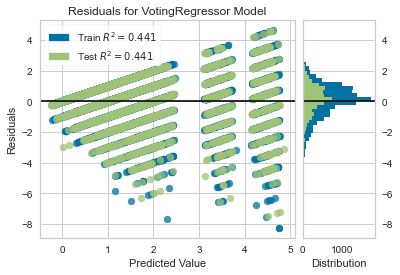

In [36]:
plot_model(female_final_model)

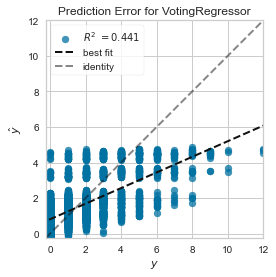

In [37]:
plot_model(female_final_model, plot='error')

/Users/ichanghun/miniforge3/envs/tens2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/ichanghun/miniforge3/envs/tens2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To r

/Users/ichanghun/miniforge3/envs/tens2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/ichanghun/miniforge3/envs/tens2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a prep

/Users/ichanghun/miniforge3/envs/tens2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/ichanghun/miniforge3/envs/tens2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To r

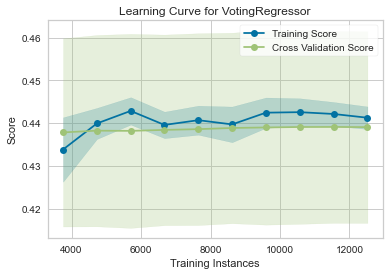

In [61]:
plot_model(female_final_model, plot='learning')

In [39]:
evaluate_model(female_final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [40]:
female_df['frequency'].describe()

count    24837.000000
mean         1.416475
std          1.655311
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: frequency, dtype: float64